In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [2]:
world_happiness=pd.read_csv('worldhappiness.cv')

In [3]:
world_happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
world_happiness.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
world_happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
world_happiness.drop(['Country','Region','Happiness Rank'],axis=1,inplace=True)

In [7]:
world_happiness

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
world_happiness.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

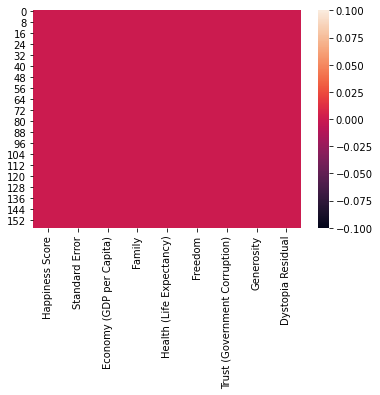

In [9]:
sns.heatmap(world_happiness.isnull())

<AxesSubplot:>

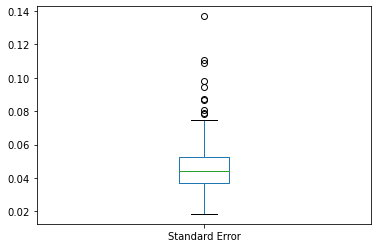

In [10]:
world_happiness['Standard Error'].plot.box()

<AxesSubplot:>

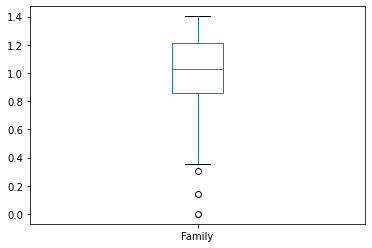

In [11]:
world_happiness['Family'].plot.box()

Happiness Score                     AxesSubplot(0.125,0.657941;0.227941x0.222059)
Standard Error                   AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Family                              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Health (Life Expectancy)         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Freedom                          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Trust (Government Corruption)          AxesSubplot(0.125,0.125;0.227941x0.222059)
Generosity                          AxesSubplot(0.398529,0.125;0.227941x0.222059)
Dystopia Residual                   AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

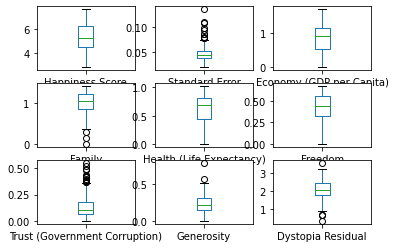

In [12]:
world_happiness.plot(kind='box',subplots=True,layout=(3,3))

In [13]:
from scipy.stats import zscore

In [14]:
z=np.abs(zscore(world_happiness))

In [15]:
z

array([[1.93736005, 0.80592569, 1.36962124, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 0.05588945, 1.13522625, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 0.8544869 , 1.19286069, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.13253425, 0.45524543, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.26396166, 2.06756644, ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.13418227, 1.58633379, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [16]:
threashold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [17]:
world_happiness.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [18]:
from scipy.stats import boxcox

In [19]:
world_happiness['Standard Error']=boxcox(world_happiness['Standard Error'],0)

In [20]:
world_happiness.skew()

Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

(array([ 3.,  2., 13., 43., 49., 24., 14.,  5.,  4.,  1.]),
 array([-3.99106621, -3.79078813, -3.59051006, -3.39023198, -3.1899539 ,
        -2.98967582, -2.78939774, -2.58911967, -2.38884159, -2.18856351,
        -1.98828543]),
 <BarContainer object of 10 artists>)

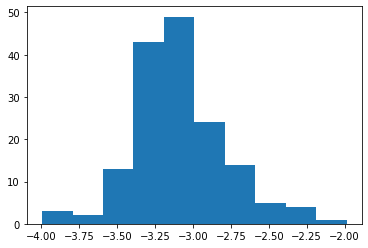

In [21]:
plt.hist(world_happiness['Standard Error'])

(array([33., 48., 32., 16.,  4., 10.,  6.,  5.,  2.,  2.]),
 array([0.      , 0.055191, 0.110382, 0.165573, 0.220764, 0.275955,
        0.331146, 0.386337, 0.441528, 0.496719, 0.55191 ]),
 <BarContainer object of 10 artists>)

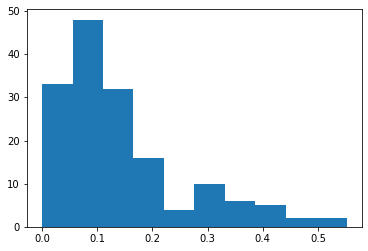

In [22]:
plt.hist(world_happiness['Trust (Government Corruption)'])

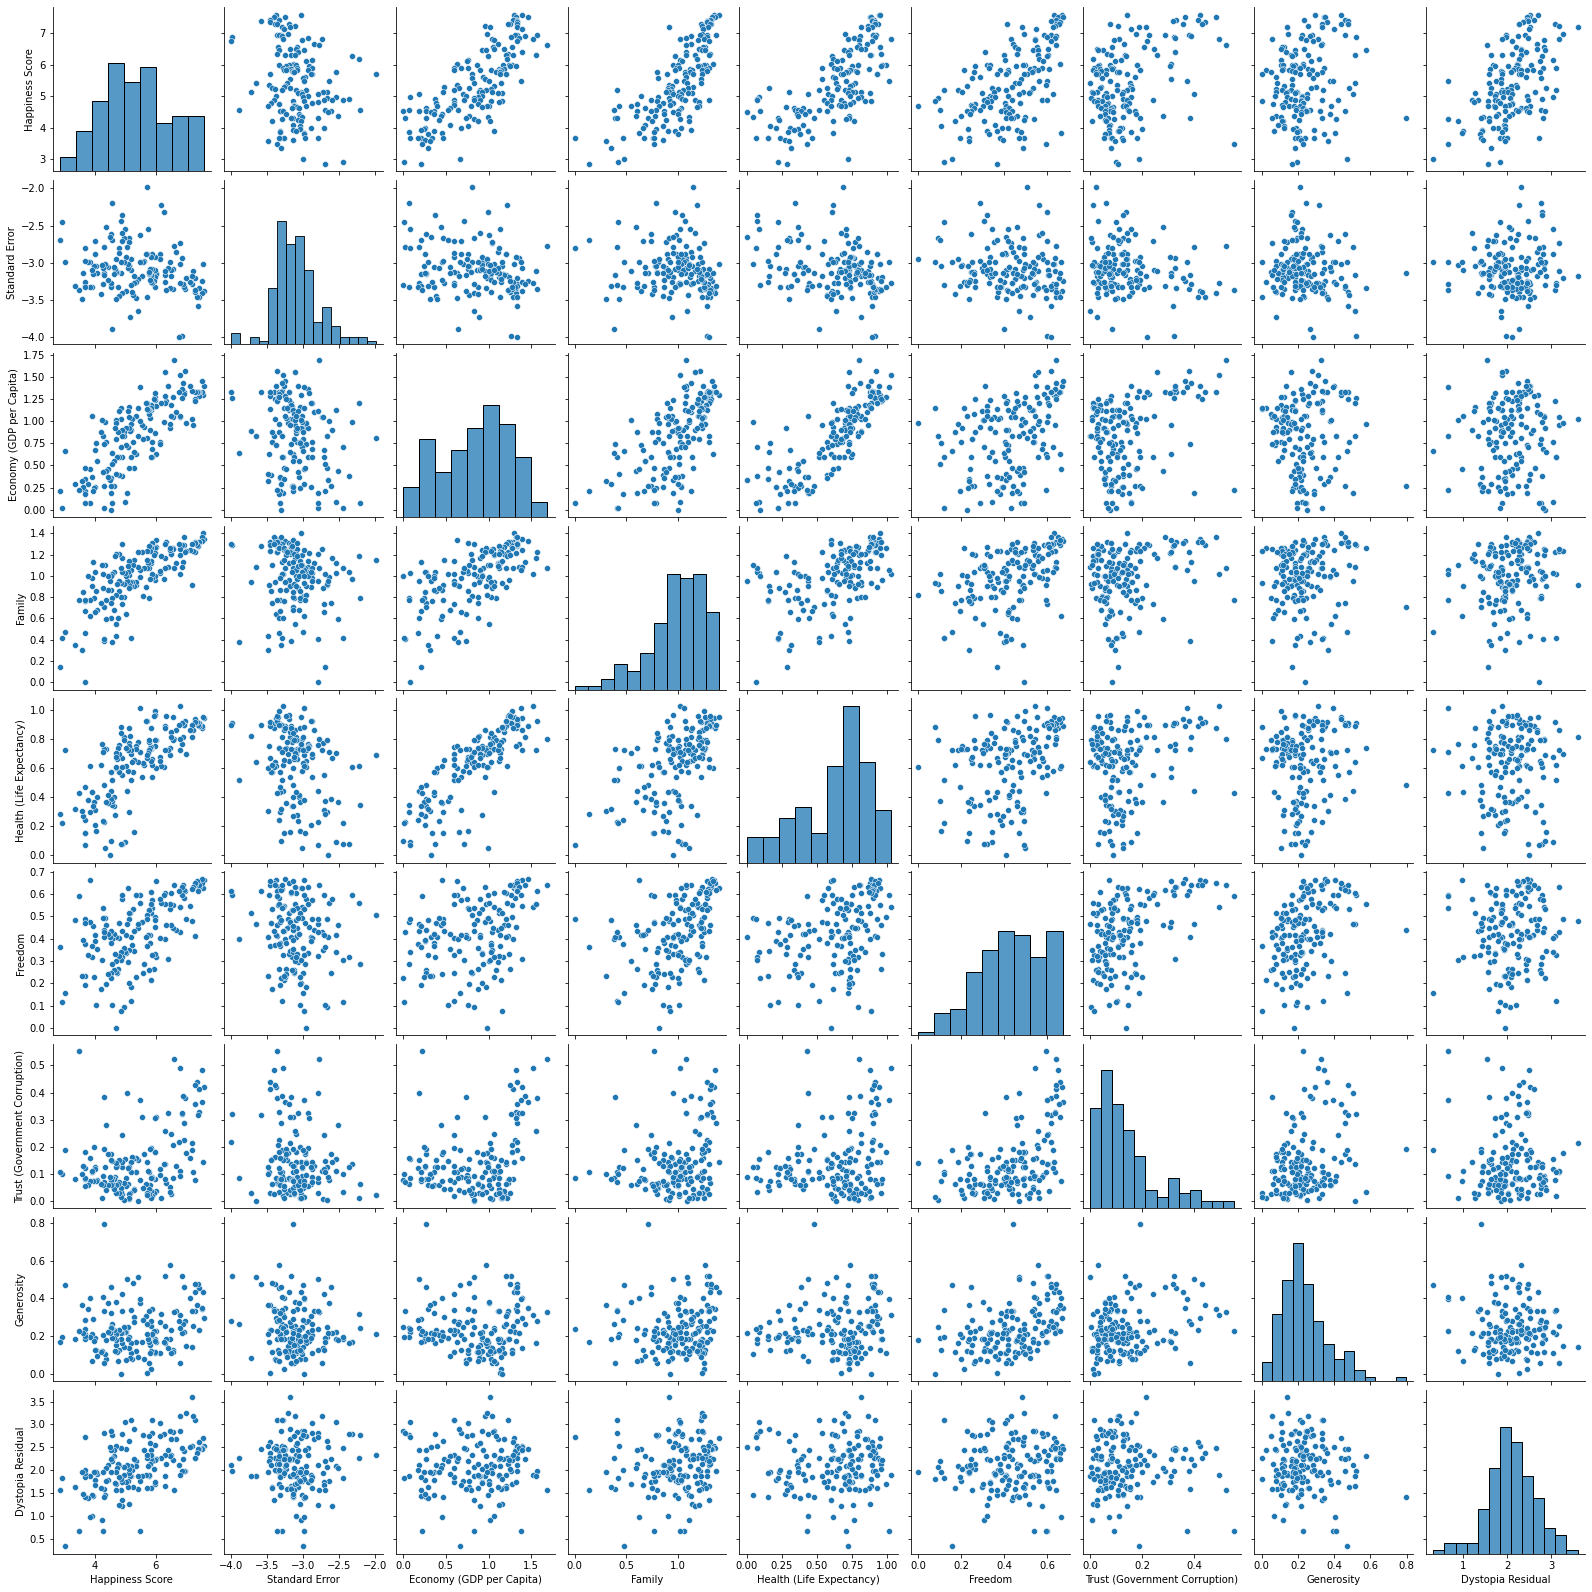

In [23]:
sns.pairplot(world_happiness)

<AxesSubplot:>

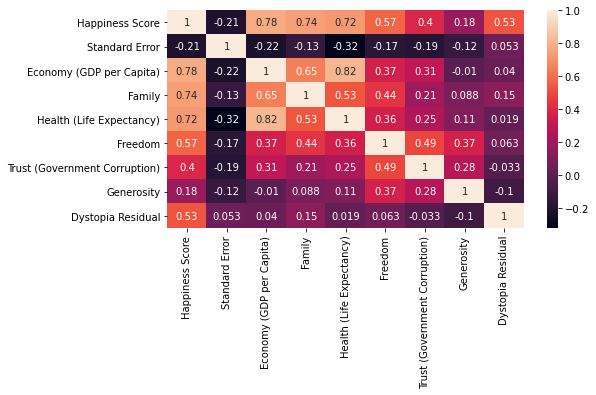

In [24]:
corr=world_happiness.corr()

fig = plt.figure(figsize =(8, 4))
sns.heatmap(corr,annot=True)



In [25]:
df=world_happiness[(z<3).all(axis=1)]

In [26]:
world_happiness.shape

(158, 9)

In [27]:
df.shape

(149, 9)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()

In [30]:
scaler.fit_transform(df)

array([[ 1.94794451, -0.91565522,  1.38191593, ...,  2.47225453,
         0.54630526,  0.7568764 ],
       [ 1.92446866,  0.33654078,  1.13832385, ...,  0.00924715,
         1.71389767,  1.10929978],
       [ 1.89376946, -1.00158863,  1.19821973, ...,  3.03674718,
         0.91963022,  0.70850719],
       ...,
       [-1.67456049, -1.26721028, -1.40259581, ..., -0.38241996,
         1.11805063, -0.32213507],
       [-1.8867461 , -0.6736847 , -1.48837933, ..., -0.53365337,
        -0.40922585, -0.9307015 ],
       [-2.27951521,  2.33372191, -2.19013866, ..., -0.35206708,
        -0.28645792, -0.54943602]])

In [31]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,-2.967923,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,-3.140989,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,-3.478943,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [32]:
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [33]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,-2.967923,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,-3.140989,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,-3.478943,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=25)

In [35]:
x_train.shape

(119, 8)

In [36]:
y_train.shape

(119,)

In [37]:
lm=LinearRegression()

In [38]:
lm

LinearRegression()

In [39]:
lm.fit(x_train,y_train)

LinearRegression()

In [40]:
lm.coef_

array([1.20649515e-05, 1.00006388e+00, 1.00007349e+00, 9.99877411e-01,
       9.99458701e-01, 1.00011673e+00, 1.00022235e+00, 1.00000841e+00])

In [41]:
lm.intercept_

9.926524191694597e-05

In [42]:
lm.score(x_train,y_train)

0.9999999421362455

In [43]:
pred=lm.predict(x_test)

In [44]:
print('predicted value:',pred)
print('actual value:',y_test)

predicted value: [4.29663826 6.00271639 5.19226859 4.87426494 4.43561488 5.77037778
 5.82826835 6.32888381 5.42853684 3.6672254  6.85288096 6.66966584
 7.3781061  5.39871777 4.36913697 5.58862442 5.09757599 4.07670042
 4.51792114 5.84759833 4.56461096 5.60463028 6.86722178 6.47670989
 6.57400044 4.55064282 4.33204395 3.65505523 6.12272172 4.34997862]
actual value: 129    4.297
43     6.003
81     5.192
99     4.874
123    4.436
60     5.770
56     5.828
35     6.329
72     5.429
148    3.667
21     6.853
26     6.670
6      7.378
73     5.399
125    4.369
68     5.589
88     5.098
135    4.077
118    4.518
54     5.848
116    4.565
67     5.605
20     6.867
32     6.477
29     6.574
117    4.550
127    4.332
150    3.655
42     6.123
126    4.350
Name: Happiness Score, dtype: float64


In [45]:
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))

mean squared error 9.088796997215949e-08
mean absolute error 0.0002628608648630089


In [46]:
from sklearn.linear_model import Ridge

In [47]:
rg=Ridge(alpha=0.001)

In [48]:
rg.fit(x_train,y_train)

Ridge(alpha=0.001)

In [49]:
rg.score(x_train,y_train)

0.9999999349148496

In [50]:
rg.coef_

array([-8.68406494e-05,  1.00020176e+00,  1.00000878e+00,  9.99633646e-01,
        9.99502142e-01,  9.99586614e-01,  9.99808653e-01,  9.99980701e-01])

In [51]:
from sklearn.linear_model import Lasso

In [52]:
ls=Lasso(alpha=.001)

In [53]:
ls.fit(x_train,y_train)

Lasso(alpha=0.001)

In [54]:
ls.score(x_train,y_train)

0.9999044583222525

In [55]:
ls.coef_

array([-0.        ,  1.01447322,  0.99161775,  0.97776649,  1.00542511,
        0.94135142,  0.95039991,  0.99683794])

In [56]:
from sklearn.linear_model import ElasticNet

In [78]:
en=ElasticNet(alpha=.001)

In [79]:
en.fit(x_train,y_train)

ElasticNet(alpha=0.001)

In [80]:
en.score(x_test,y_test)

0.9998923072222123

In [81]:
en.coef_

array([-0.00374617,  1.01442141,  0.99221324,  0.97647852,  1.0030671 ,
        0.94307455,  0.95221964,  0.99680552])

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
dtc=DecisionTreeRegressor()

In [63]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
dtc.score(x_train,y_train)

1.0

In [66]:
from sklearn.svm import SVR

In [67]:
svr=SVR()

In [68]:
svr.fit(x_train,y_train)

SVR()

In [69]:
svr.score(x_train,y_train)

0.989248368387091

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [72]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [73]:
rf.score(x_test,y_test)

0.9365283477026578

In [74]:
from sklearn.ensemble import AdaBoostRegressor

In [75]:
ab=AdaBoostRegressor()

In [76]:
ab.fit(x_train,y_train)

AdaBoostRegressor()

In [77]:
ab.score(x_train,y_train)

0.9554719318331123